In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


In [2]:
import seaborn as sns
import re

## 1. 数据预处理
数据属性共14个，分别为：
- ID：编号
- Contract：是否有合同
- Dependents：是否有家属
- DeviceProtection：是否有设备保护
- IntenrnetService：是否有互联网服务
- MonthlyCharges：月度费用
- MultipleLines：是否有多条线路
- Partner：是否有配偶
- PaymentsMethod：付款方式
- PhoneService：是否有电话服务
- SeniorCitizen：是否为老年人
- TVProgram：是否有电视节目
- TotalCharges：总费用
- gender：性别
- tenure：任期年数

在训练集中，增加了标签属性：
- Label：用户是否流失

In [3]:
# 导入数据集
custmer_train = pd.read_csv("train.csv")
custmer_test = pd.read_csv('test_noLabel.csv')
custmer_sample = pd.read_csv('samples_noLabel.csv')

In [4]:
custmer_train.head()

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,One year,No,No internet service,No,24.150000,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,1505.900000,Male,60,No
1,1,Month-to-month,No,No,Fiber optic,76.142284,Yes,No,Electronic check,Yes,0,No,946.581518,Female,12,Yes
2,2,Month-to-month,Yes,No internet service,No,26.200000,Yes,Yes,Electronic check,Yes,0,No internet service,1077.500000,Female,40,No
3,3,Two year,Yes,No internet service,No,24.650000,Yes,Yes,Bank transfer (automatic),Yes,0,No internet service,1138.800000,Female,45,No
4,4,Month-to-month,Yes,No internet service,No,19.150000,No,Yes,Mailed check,Yes,0,No internet service,477.600000,Male,25,No


### 1.1 数据摘要

In [5]:
# 训练集的行列数
custmer_train.shape,custmer_test.shape,custmer_sample.shape

((5227, 16), (1307, 15), (755, 15))

In [6]:
# 属性名
custmer_train.columns.values,custmer_test.columns.values,custmer_sample.columns.values

(array(['ID', 'Contract', 'Dependents', 'DeviceProtection',
        'InternetService', 'MonthlyCharges', 'MultipleLines', 'Partner',
        'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'TVProgram',
        'TotalCharges', 'gender', 'tenure', 'Label'], dtype=object),
 array(['ID', 'Contract', 'Dependents', 'DeviceProtection',
        'InternetService', 'MonthlyCharges', 'MultipleLines', 'Partner',
        'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'TVProgram',
        'TotalCharges', 'gender', 'tenure'], dtype=object),
 array(['ID', 'Contract', 'Dependents', 'DeviceProtection',
        'InternetService', 'MonthlyCharges', 'MultipleLines', 'Partner',
        'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'TVProgram',
        'TotalCharges', 'gender', 'tenure'], dtype=object))

In [7]:
# 检查流失客户的比例
custmer_train['Label'].value_counts(),custmer_train['Label'].value_counts(1)

(No     3280
 Yes    1947
 Name: Label, dtype: int64,
 No     0.627511
 Yes    0.372489
 Name: Label, dtype: float64)

**训练集中流失客户约占37%**

In [8]:
# 检查空值
custmer_train.isnull().sum(),custmer_test.isnull().sum()

(ID                  0
 Contract            0
 Dependents          0
 DeviceProtection    0
 InternetService     0
 MonthlyCharges      0
 MultipleLines       0
 Partner             0
 PaymentMethod       0
 PhoneService        0
 SeniorCitizen       0
 TVProgram           0
 TotalCharges        0
 gender              0
 tenure              0
 Label               0
 dtype: int64,
 ID                  0
 Contract            0
 Dependents          0
 DeviceProtection    0
 InternetService     0
 MonthlyCharges      0
 MultipleLines       0
 Partner             0
 PaymentMethod       0
 PhoneService        0
 SeniorCitizen       0
 TVProgram           0
 TotalCharges        0
 gender              0
 tenure              0
 dtype: int64)

In [9]:
# 查看各属性值的取值
for column in custmer_train.columns:
    if custmer_train[column].nunique() < custmer_train.shape[0]:
        print(column)
        print(custmer_train[column].value_counts())
        print('============================')
        print('\n')

Contract
Month-to-month    3386
Two year           974
One year           867
Name: Contract, dtype: int64


Dependents
No     4049
Yes    1178
Name: Dependents, dtype: int64


DeviceProtection
No                     2777
Yes                    1504
No internet service     946
Name: DeviceProtection, dtype: int64


InternetService
Fiber optic    2803
DSL            1478
No              946
Name: InternetService, dtype: int64


MonthlyCharges
20.050000    36
19.700000    31
19.850000    28
20.000000    28
19.950000    27
             ..
86.306127     1
83.014385     1
66.650000     1
55.356906     1
21.560008     1
Name: MonthlyCharges, Length: 2620, dtype: int64


MultipleLines
No                  2542
Yes                 2315
No phone service     370
Name: MultipleLines, dtype: int64


Partner
No     3014
Yes    2213
Name: Partner, dtype: int64


PaymentMethod
Electronic check             2517
Mailed check                  987
Bank transfer (automatic)     869
Credit card (automatic) 

In [10]:
# 查看各属性值的取值
for column in custmer_test.columns:
    if custmer_test[column].nunique() < custmer_test.shape[0]:
        print(column)
        print(custmer_test[column].value_counts())
        print('============================')
        print('\n')

Contract
Month-to-month    791
Two year          261
One year          255
Name: Contract, dtype: int64


Dependents
No     956
Yes    351
Name: Dependents, dtype: int64


DeviceProtection
No                     655
Yes                    412
No internet service    240
Name: DeviceProtection, dtype: int64


InternetService
Fiber optic    654
DSL            413
No             240
Name: InternetService, dtype: int64


MonthlyCharges
20.050000     11
19.900000      9
19.600000      9
19.850000      9
20.350000      9
              ..
77.003283      1
90.063308      1
75.650000      1
50.350000      1
112.250000     1
Name: MonthlyCharges, Length: 900, dtype: int64


MultipleLines
No                  625
Yes                 582
No phone service    100
Name: MultipleLines, dtype: int64


Partner
No     721
Yes    586
Name: Partner, dtype: int64


PaymentMethod
Electronic check             544
Mailed check                 279
Credit card (automatic)      246
Bank transfer (automatic)    238


**数据集中无缺失值**

In [11]:
# 查看训练集每列数据类型
custmer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5227 non-null   int64  
 1   Contract          5227 non-null   object 
 2   Dependents        5227 non-null   object 
 3   DeviceProtection  5227 non-null   object 
 4   InternetService   5227 non-null   object 
 5   MonthlyCharges    5227 non-null   float64
 6   MultipleLines     5227 non-null   object 
 7   Partner           5227 non-null   object 
 8   PaymentMethod     5227 non-null   object 
 9   PhoneService      5227 non-null   object 
 10  SeniorCitizen     5227 non-null   int64  
 11  TVProgram         5227 non-null   object 
 12  TotalCharges      5227 non-null   float64
 13  gender            5227 non-null   object 
 14  tenure            5227 non-null   int64  
 15  Label             5227 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory

In [12]:
# 每列属性值的类型
custmer_train.nunique(),custmer_test.nunique()

(ID                  5227
 Contract               3
 Dependents             2
 DeviceProtection       3
 InternetService        3
 MonthlyCharges      2620
 MultipleLines          3
 Partner                2
 PaymentMethod          4
 PhoneService           2
 SeniorCitizen          2
 TVProgram              3
 TotalCharges        5016
 gender                 2
 tenure                73
 Label                  2
 dtype: int64,
 ID                  1307
 Contract               3
 Dependents             2
 DeviceProtection       3
 InternetService        3
 MonthlyCharges       900
 MultipleLines          3
 Partner                2
 PaymentMethod          4
 PhoneService           2
 SeniorCitizen          2
 TVProgram              3
 TotalCharges        1289
 gender                 2
 tenure                72
 dtype: int64)

In [13]:
custmer_train[custmer_train['tenure']==0]

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
552,552,Two year,Yes,No internet service,No,20.00,No,Yes,Mailed check,Yes,0,No internet service,2283.300441,Female,0,No
921,921,Two year,Yes,No internet service,No,20.25,No,No,Mailed check,Yes,0,No internet service,2283.300441,Male,0,No
927,927,One year,Yes,No internet service,No,19.70,No,Yes,Mailed check,Yes,0,No internet service,2283.300441,Male,0,No
3002,3002,Two year,Yes,No,DSL,61.90,Yes,No,Bank transfer (automatic),Yes,0,No,2283.300441,Male,0,No
3026,3026,Two year,Yes,No internet service,No,25.35,Yes,Yes,Mailed check,Yes,0,No internet service,2283.300441,Male,0,No
3139,3139,Two year,Yes,No internet service,No,25.75,Yes,Yes,Mailed check,Yes,0,No internet service,2283.300441,Male,0,No
4165,4165,Two year,Yes,Yes,DSL,80.85,No,Yes,Mailed check,Yes,0,Yes,2283.300441,Female,0,No
4896,4896,Two year,Yes,Yes,DSL,52.55,No phone service,Yes,Bank transfer (automatic),No,0,Yes,2283.300441,Female,0,No


经上述操作后，得到如下信息：
- 数据不存在空值
- PhoneService为No的MultipleLines为No phone service，二者存在关联
- InternetService为No的DeviceProtection，TVProgram为No internet service，存在关联
- tenure为0的8行数据对应的TotalCharfes为2283.300441，在TotalCharges中为最大值，考虑可能是为tenure为0的用户总费用设为最大值。

**除ID外，MonthlyCharges， TotalCharges，tenure的取值众多，之后需要具体分析**

### 1.2 数据清洗
主要任务包括：
- 二值属性转为0/1，其中yes为1,No为0
- 多值属性用one-hot，去掉第一个，将处理后数据附加在数据后
- 包含No xx service的多值属性，one-hot值去掉该列
- 删除处理前的属性列

#### 二值属性转0/1

In [14]:
custmer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                5227 non-null   int64  
 1   Contract          5227 non-null   object 
 2   Dependents        5227 non-null   object 
 3   DeviceProtection  5227 non-null   object 
 4   InternetService   5227 non-null   object 
 5   MonthlyCharges    5227 non-null   float64
 6   MultipleLines     5227 non-null   object 
 7   Partner           5227 non-null   object 
 8   PaymentMethod     5227 non-null   object 
 9   PhoneService      5227 non-null   object 
 10  SeniorCitizen     5227 non-null   int64  
 11  TVProgram         5227 non-null   object 
 12  TotalCharges      5227 non-null   float64
 13  gender            5227 non-null   object 
 14  tenure            5227 non-null   int64  
 15  Label             5227 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory

In [15]:
collist = ['Dependents','Partner','PhoneService','Label']
# map函数
def binary_map(x):
    return x.map({'Yes':1,"No":0})
custmer_train[collist] = custmer_train[collist].apply(binary_map)
col = ['Dependents','Partner','PhoneService']
custmer_test[col] = custmer_test[col].apply(binary_map)

In [16]:
custmer_train.head()

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,SeniorCitizen,TVProgram,TotalCharges,gender,tenure,Label
0,0,One year,0,No internet service,No,24.150000,Yes,1,Bank transfer (automatic),1,0,No internet service,1505.900000,Male,60,0
1,1,Month-to-month,0,No,Fiber optic,76.142284,Yes,0,Electronic check,1,0,No,946.581518,Female,12,1
2,2,Month-to-month,1,No internet service,No,26.200000,Yes,1,Electronic check,1,0,No internet service,1077.500000,Female,40,0
3,3,Two year,1,No internet service,No,24.650000,Yes,1,Bank transfer (automatic),1,0,No internet service,1138.800000,Female,45,0
4,4,Month-to-month,1,No internet service,No,19.150000,No,1,Mailed check,1,0,No internet service,477.600000,Male,25,0


#### 多值属性用one-hot，去掉第一个

In [17]:
# train one-hot 
# 3个属性，新增2*2+3*1+1*1
dummy1 = pd.get_dummies(custmer_train[['Contract','InternetService','PaymentMethod','gender']],
                       drop_first=True)

# 拼接到源数据
custmer_train = pd.concat([custmer_train,dummy1],axis=1)

# test
dummy2 = pd.get_dummies(custmer_test[['Contract','InternetService','PaymentMethod','gender']],
                       drop_first=True)
custmer_test = pd.concat([custmer_test,dummy2],axis=1)

In [18]:
custmer_train.head()

,ID,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,Partner,PaymentMethod,PhoneService,...,tenure,Label,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,0,One year,0,No internet service,No,24.150000,Yes,1,Bank transfer (automatic),1,...,60,0,1,0,0,1,0,0,0,1
1,1,Month-to-month,0,No,Fiber optic,76.142284,Yes,0,Electronic check,1,...,12,1,0,0,1,0,0,1,0,0
2,2,Month-to-month,1,No internet service,No,26.200000,Yes,1,Electronic check,1,...,40,0,0,0,0,1,0,1,0,0
3,3,Two year,1,No internet service,No,24.650000,Yes,1,Bank transfer (automatic),1,...,45,0,0,1,0,1,0,0,0,0
4,4,Month-to-month,1,No internet service,No,19.150000,No,1,Mailed check,1,...,25,0,0,0,0,1,0,0,1,1


In [19]:
# 有no xx service的做one-hot时删掉这个
# 3个属性，新增2*3列,删除原数据
# DeviceProtection
dp = pd.get_dummies(custmer_train['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
custmer_train = pd.concat([custmer_train,dp1],axis=1)
custmer_train = custmer_train.drop(['DeviceProtection'],1)

dp_t = pd.get_dummies(custmer_test['DeviceProtection'],prefix='DeviceProtection')
dp_t1 = dp_t.drop(['DeviceProtection_No internet service'],1)
custmer_test = pd.concat([custmer_test,dp_t1],axis=1)
custmer_test = custmer_test.drop(['DeviceProtection'],1)

# 'MultipleLines'
ml = pd.get_dummies(custmer_train['MultipleLines'],prefix='MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'],1)
custmer_train = pd.concat([custmer_train,ml1],axis=1)
custmer_train = custmer_train.drop(['MultipleLines'],1)

ml_t = pd.get_dummies(custmer_test['MultipleLines'],prefix='MultipleLines')
ml_t1 = ml_t.drop(['MultipleLines_No phone service'],1)
custmer_test = pd.concat([custmer_test,ml_t1],axis=1)
custmer_test = custmer_test.drop(['MultipleLines'],1)

# 'TVProgram'
tv = pd.get_dummies(custmer_train['TVProgram'],prefix='TVProgram')
tv1 = tv.drop(['TVProgram_No internet service'],1)
custmer_train = pd.concat([custmer_train,tv1],axis=1)
custmer_train = custmer_train.drop(['TVProgram'],1)

tv_t = pd.get_dummies(custmer_test['TVProgram'],prefix='TVProgram')
tv_t1 = tv_t.drop(['TVProgram_No internet service'],1)
custmer_test = pd.concat([custmer_test,tv_t1],axis=1)
custmer_test = custmer_test.drop(['TVProgram'],1)


#### 删掉one-hot前的数据


In [20]:
# Contract
custmer_train = custmer_train.drop(['Contract'],1)
custmer_test = custmer_test.drop(['Contract'],1)
# InternetService
custmer_train = custmer_train.drop(['InternetService'],1)
custmer_test = custmer_test.drop(['InternetService'],1)
# PaymentMethod
custmer_train = custmer_train.drop(['PaymentMethod'],1)
custmer_test = custmer_test.drop(['PaymentMethod'],1)
# gender
custmer_train = custmer_train.drop(['gender'],1)
custmer_test = custmer_test.drop(['gender'],1)

In [21]:
custmer_train.head()

,ID,Dependents,MonthlyCharges,Partner,PhoneService,SeniorCitizen,TotalCharges,tenure,Label,Contract_One year,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,DeviceProtection_No,DeviceProtection_Yes,MultipleLines_No,MultipleLines_Yes,TVProgram_No,TVProgram_Yes
0,0,0,24.150000,1,1,0,1505.900000,60,0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,0,76.142284,0,1,0,946.581518,12,1,0,...,0,1,0,0,1,0,0,1,1,0
2,2,1,26.200000,1,1,0,1077.500000,40,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3,1,24.650000,1,1,0,1138.800000,45,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1,19.150000,1,1,0,477.600000,25,0,0,...,0,0,1,1,0,0,1,0,0,0


In [22]:
# ['ID', 'Contract', 'Dependents', 'DeviceProtection',
#         'InternetService', 'MonthlyCharges', 'MultipleLines', 'Partner',
#         'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'TVProgram',
#         'TotalCharges', 'gender', 'tenure', 'Label']

In [23]:
custmer_train[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,5227.000000,5227.000000,5227.000000,5227.000000
mean,28.775971,66.823765,0.118615,2084.477153
std,24.293077,28.862749,0.323366,2183.825066
min,0.000000,18.250000,0.000000,18.800000
25%,5.000000,45.000000,0.000000,292.979609
50%,23.000000,74.200000,0.000000,1218.650000
75%,51.000000,89.900000,0.000000,3373.825000
90%,67.000000,101.395283,1.000000,5683.670000
95%,71.000000,106.196180,1.000000,6632.480000
99%,72.000000,114.037000,1.000000,7937.495000


In [24]:
# custmer_train.to_csv('pro_train_t.csv',index=False)
# custmer_test.to_csv('pro_test_t.csv',index=False)

In [25]:
custmer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     5227 non-null   int64  
 1   Dependents                             5227 non-null   int64  
 2   MonthlyCharges                         5227 non-null   float64
 3   Partner                                5227 non-null   int64  
 4   PhoneService                           5227 non-null   int64  
 5   SeniorCitizen                          5227 non-null   int64  
 6   TotalCharges                           5227 non-null   float64
 7   tenure                                 5227 non-null   int64  
 8   Label                                  5227 non-null   int64  
 9   Contract_One year                      5227 non-null   uint8  
 10  Contract_Two year                      5227 non-null   uint8  
 11  Inte

### 1.3 特征缩放
- 由于tenure,MonthlyCharges,TotalCharges数值分布范围广，采用特征缩放处理。

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
# scaler = StandardScaler()

# X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
# X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
# X_train.head()

### 1.4 特征选择

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [29]:
# 划分数据集
X = custmer_train.drop(['ID','Label'],axis=1)
y = custmer_train['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)


In [30]:
logreg = LogisticRegression()
rfe = RFE(logreg, 17)             # running RFE with 17 variables as output
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=17 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_ite

[('Dependents', True, 1),
 ('MonthlyCharges', False, 4),
 ('Partner', True, 1),
 ('PhoneService', True, 1),
 ('SeniorCitizen', True, 1),
 ('TotalCharges', False, 5),
 ('tenure', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 3),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', True, 1),
 ('DeviceProtection_No', True, 1),
 ('DeviceProtection_Yes', True, 1),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('TVProgram_No', True, 1),
 ('TVProgram_Yes', True, 1)]

In [31]:
col = X_train.columns[rfe.support_]

## 2. 数据可视化

Text(0.5, 1.0, '训练集和测试集的InternetService取值个数分布')

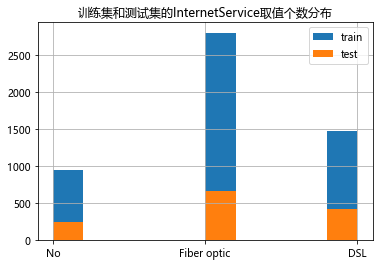

In [32]:
# 加载数据
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test_noLabel.csv')
# InternetService
train_data['InternetService'].hist(label='train'),test_data['InternetService'].hist(label='test')
plt.legend(loc='upper right')
plt.title('训练集和测试集的InternetService取值个数分布')

Text(0.5, 1.0, '训练集和测试集的PaymentMethod取值个数分布')

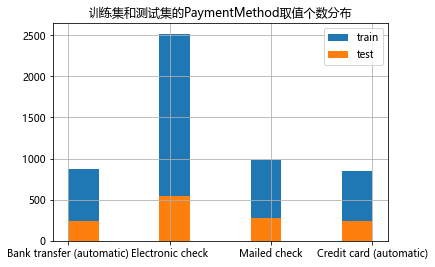

In [33]:
# PaymentMethod
train_data['PaymentMethod'].hist(label='train'),test_data['PaymentMethod'].hist(label='test')
plt.legend(loc='upper right')
plt.title('训练集和测试集的PaymentMethod取值个数分布')

Text(0.5, 1.0, '训练集和测试集的gender取值个数分布')

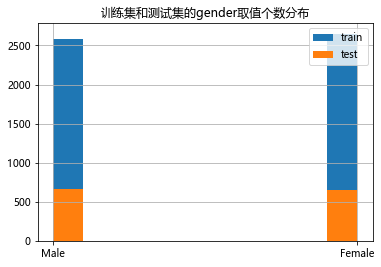

In [34]:
# gender
train_data['gender'].hist(label='train'),test_data['gender'].hist(label='test')
plt.legend(loc='upper right')
plt.title('训练集和测试集的gender取值个数分布')

Text(0.5, 1.0, '训练集和测试集的Contract取值个数分布')

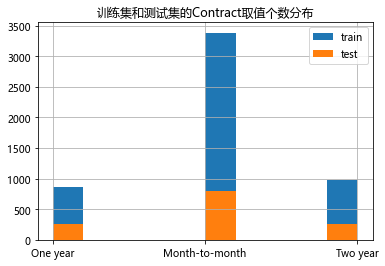

In [35]:
# Contract
train_data['Contract'].hist(label='train'),test_data['Contract'].hist(label='test')
plt.legend(loc='upper right')
plt.title('训练集和测试集的Contract取值个数分布')


Text(0.5, 1.0, '训练集和测试集的TotalCharges取值个数分布')

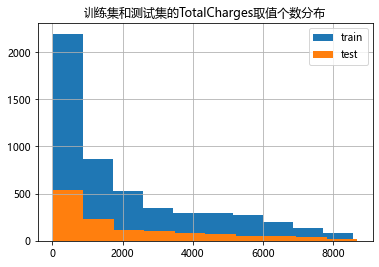

In [36]:
# TotalCharges
train_data['TotalCharges'].hist(label='train'),test_data['TotalCharges'].hist(label='test')
plt.legend(loc='upper right')
plt.title('训练集和测试集的TotalCharges取值个数分布')

Text(0.5, 1.0, '训练集和测试集的DeviceProtection取值个数分布')

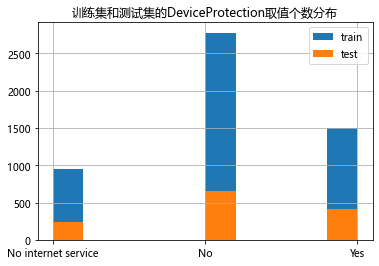

In [37]:
# DeviceProtection
train_data['DeviceProtection'].hist(label='train'),test_data['DeviceProtection'].hist(label='test')
plt.legend(loc='upper right')
plt.title('训练集和测试集的DeviceProtection取值个数分布')

In [38]:
# TotalCharges
tr = train_data['TotalCharges'].value_counts().head(300)
te = test_data['TotalCharges'].value_counts().head(300)


Text(0.5, 1.0, '训练集和测试集TotalCharges对比')

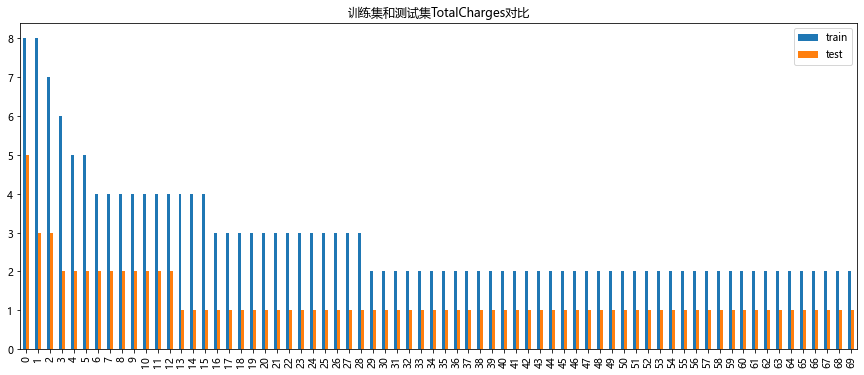

In [39]:
pltdf = pd.DataFrame({'train':tr.values,'test':te.values})
plt.rcParams['figure.figsize']=(15,6)
pltdf.sort_index().head(70).plot.bar()
plt.title('训练集和测试集TotalCharges对比')

**可以看到，训练集和测试集的数据分布是一致的。**

### 2.2 相关性可视化

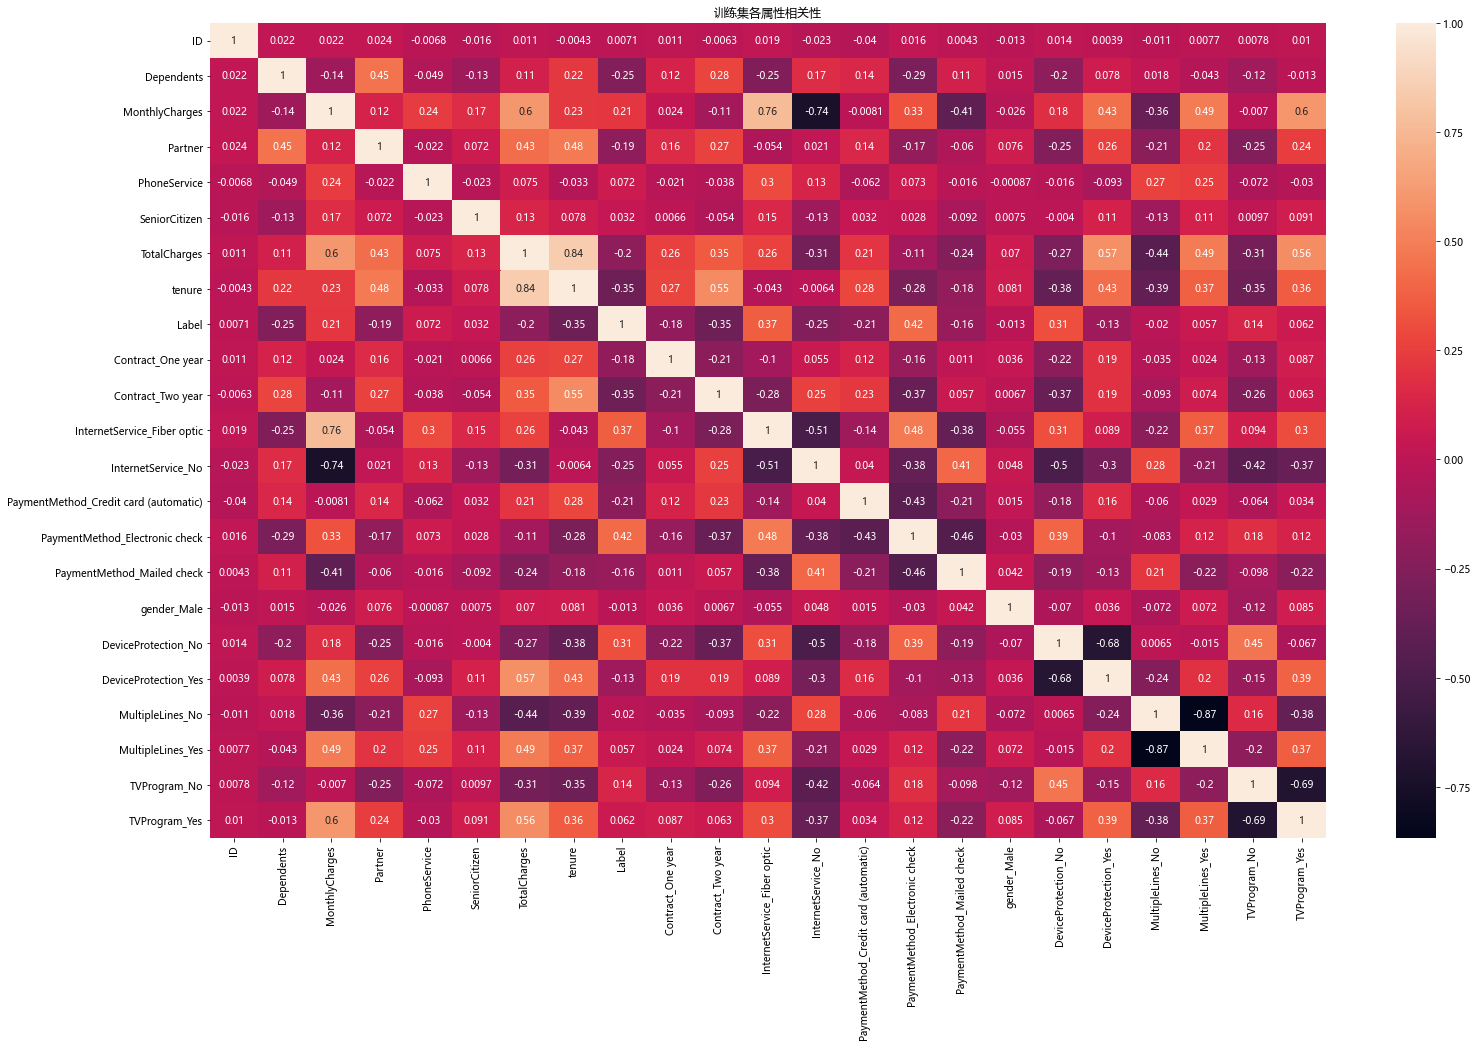

In [40]:
plt.figure(figsize=(25,15))
plt.title('训练集各属性相关性')
sns.heatmap(custmer_train.corr(),annot=True)
plt.show()

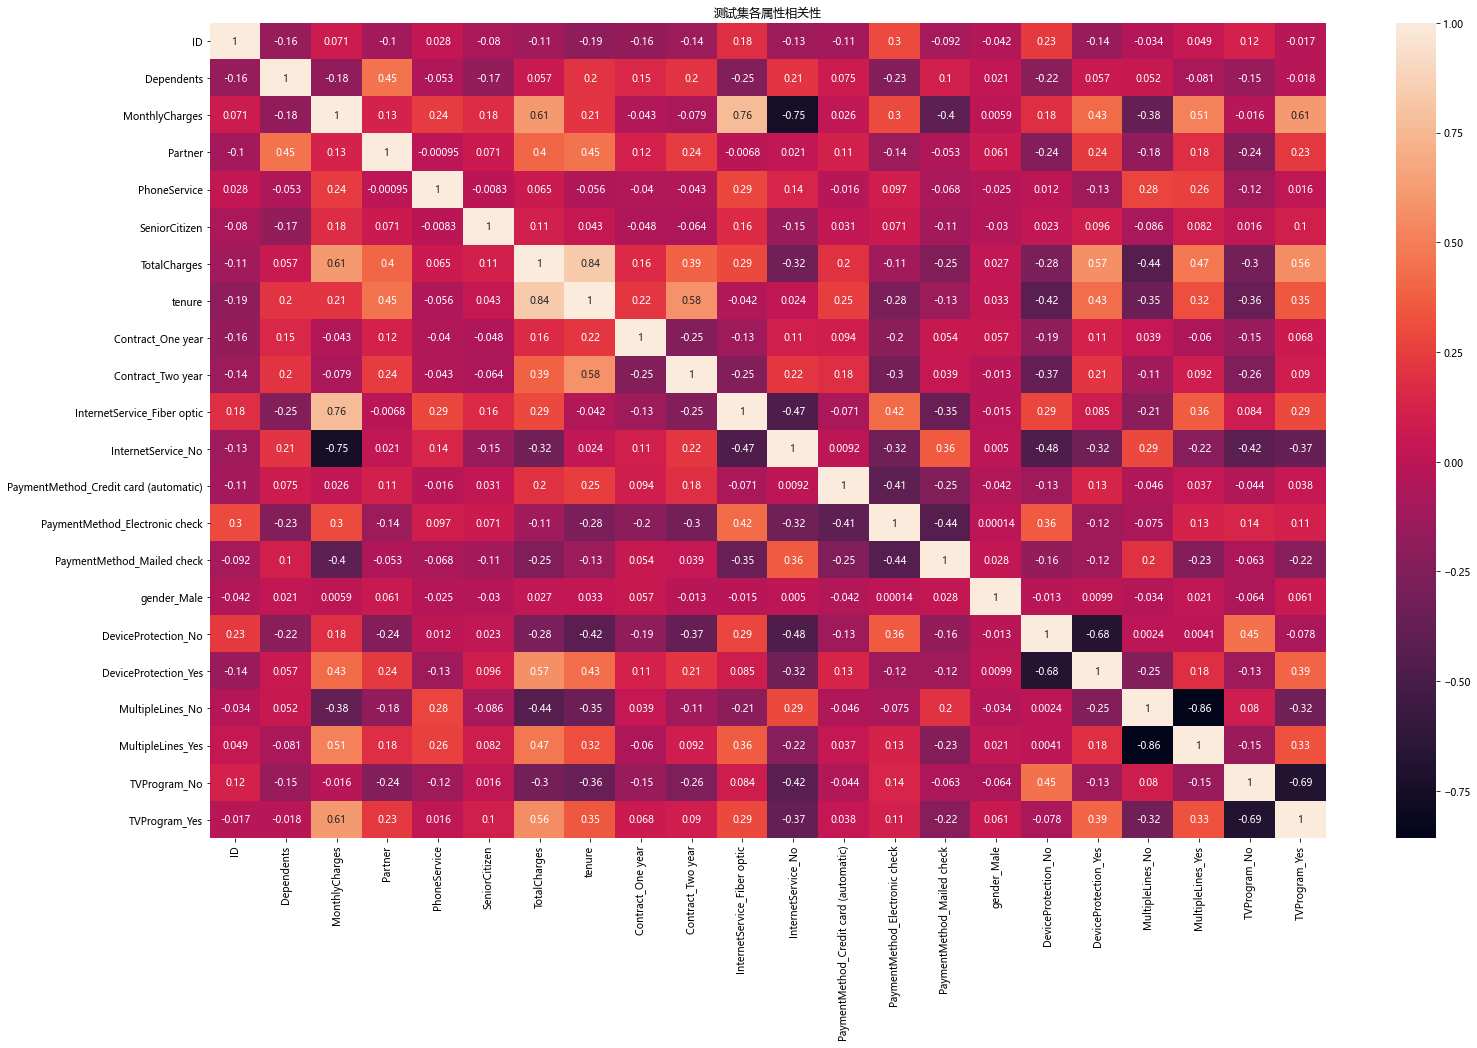

In [41]:
plt.figure(figsize=(25,15))
plt.title('测试集各属性相关性')
sns.heatmap(custmer_test.corr(),annot=True)
plt.show()

### 2.3 客户属性维度分析
主要任务包括：
- 针对二值属性统计不同属性值的客户流失情况。
- 针对三值属性分析不同属性值的客户流失情况，衡量预处理的合理性。
- 针对合同签约期限分析不同期限的客户流失情况。
- 针对数值属性采用核函数绘图分析客户流失情况。

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


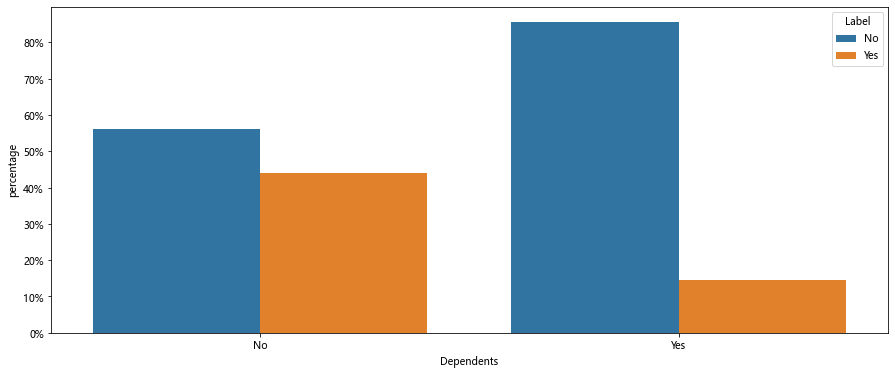

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


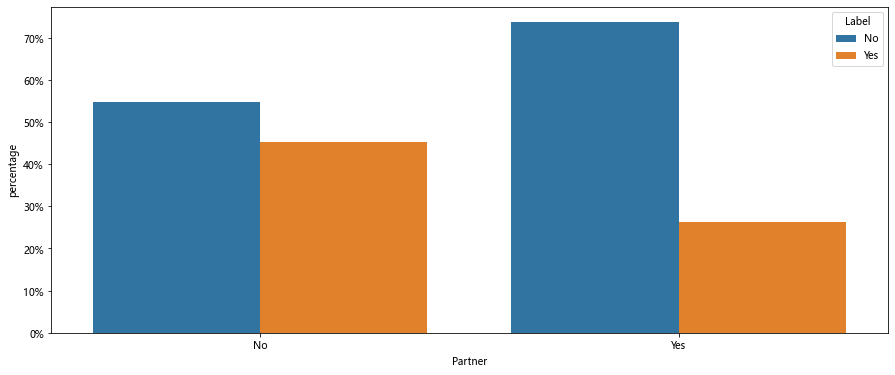

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


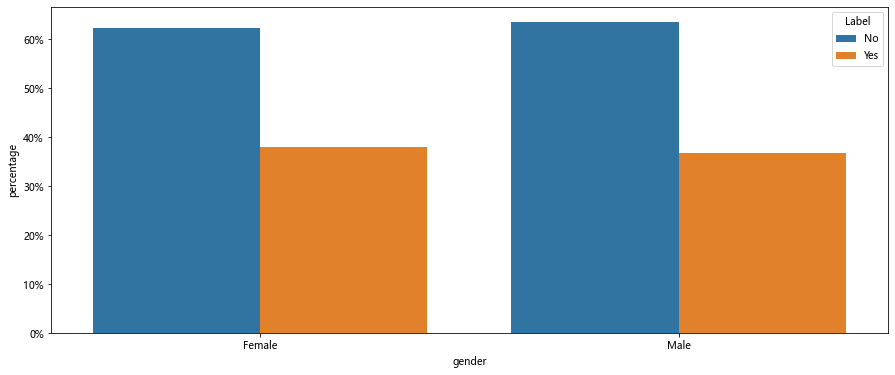

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


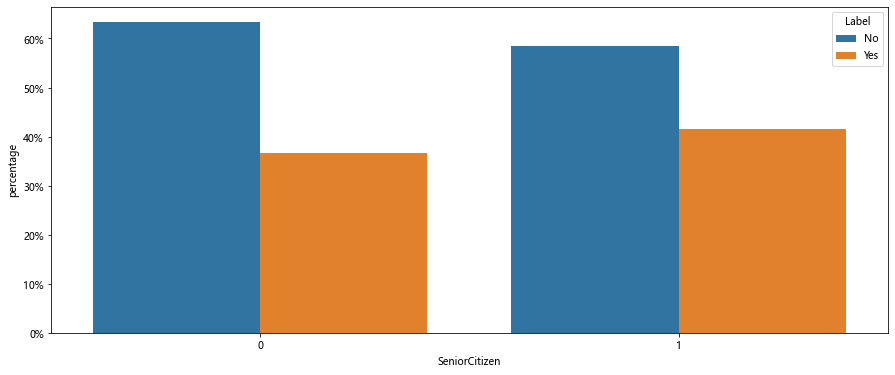

In [42]:
# 客户二值属性分析
import sys
def barplot_percentages(df,feature):
    g=df.groupby(by=feature)['Label'].value_counts(1).to_frame()
    g.rename(columns={'Label':'percentage'},inplace=True)
    g.reset_index(inplace=True)
    
    ax=sns.barplot(x=feature,y='percentage', hue='Label', data=g)
    ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    plt.show()

userProfile=train_data[['Dependents','Partner','gender','SeniorCitizen','Label']]
barplot_percentages(userProfile,'Dependents')
barplot_percentages(userProfile,'Partner')
barplot_percentages(userProfile,'gender')
barplot_percentages(userProfile,'SeniorCitizen')

根据以上分析得出结论：
- 有家属和无家属的客户流失量相差最大，其中有家属客户流失量更少。
- 单身用户的客户流失量大于非单身用户，差距较为明显。
- 性别及年老与否对客户流失量几乎无影响。其中，老年人比非老年人的客户流失量高，但程度不大。

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


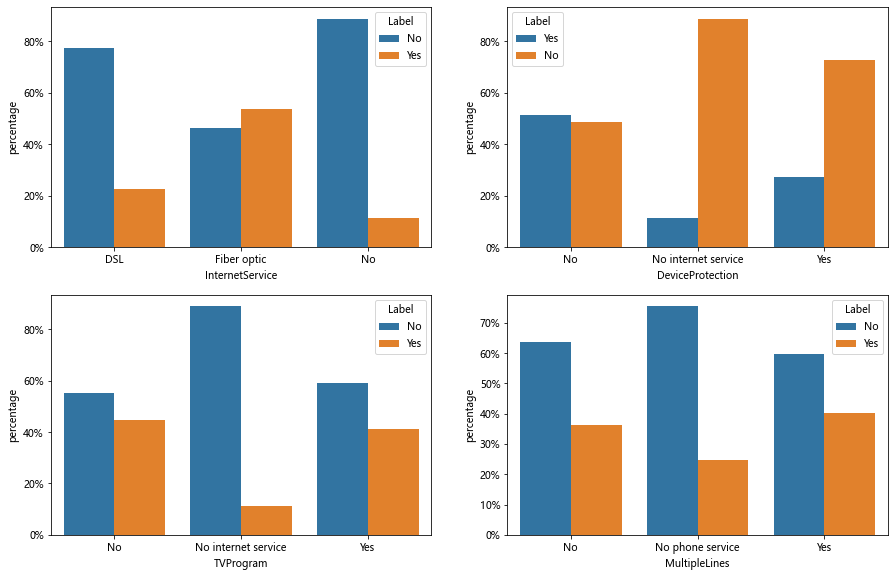

In [43]:
# 客户三值数据分析
def multi_barplot_percentages(df,features):
    plt.figure(figsize=(15,15))
    fig=plt.subplot()
    cnt=0
    for feature in features:
        g=df.groupby(by=feature)['Label'].value_counts(1).to_frame()
        g.rename(columns={'Label':'percentage'},inplace=True)
        g.reset_index(inplace=True)
        
        plt.subplot(321+cnt)
        ax=sns.barplot(x=feature,y='percentage', hue='Label', data=g)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        cnt+=1
    plt.show()
userUsageFeatures=train_data[['InternetService','DeviceProtection','TVProgram','MultipleLines','Label']]
multi_barplot_percentages(userUsageFeatures,['InternetService','DeviceProtection','TVProgram','MultipleLines'])


对客户使用情况进行分析后得出：
- 具有光纤服务，无设备保护的用户较其他用户易于流失。
- No Internet service在TVProgram以及DeviceProtection中客户流失较少，将两个属性作为one-hot时的删除项影响较小。

D:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


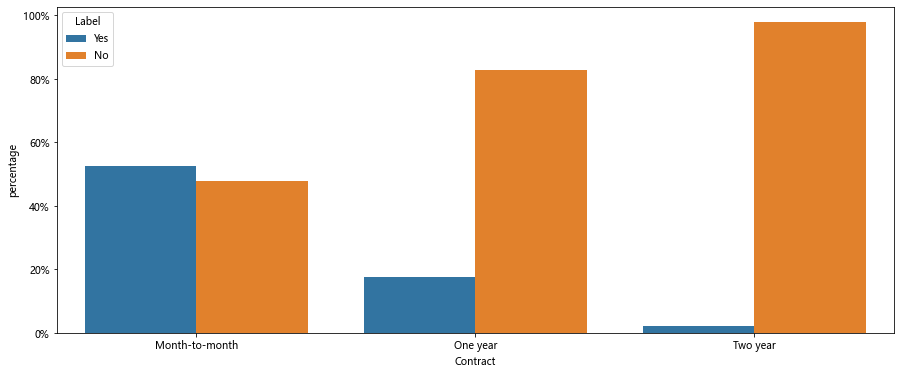

In [44]:
# 客户合同期限
userContractFeatures = train_data[['Contract','TotalCharges','Label']]
barplot_percentages(userContractFeatures,'Contract')

合同签约期限越长，客户流失越严重，说明该业务可能在长期内很难为用户提供满意的服务，从而造成客户流失，今后可能需要优化业务使其满足用户长期需要。

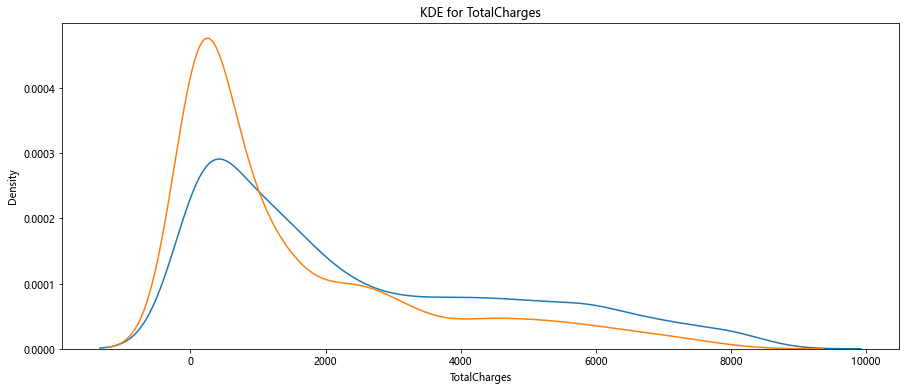

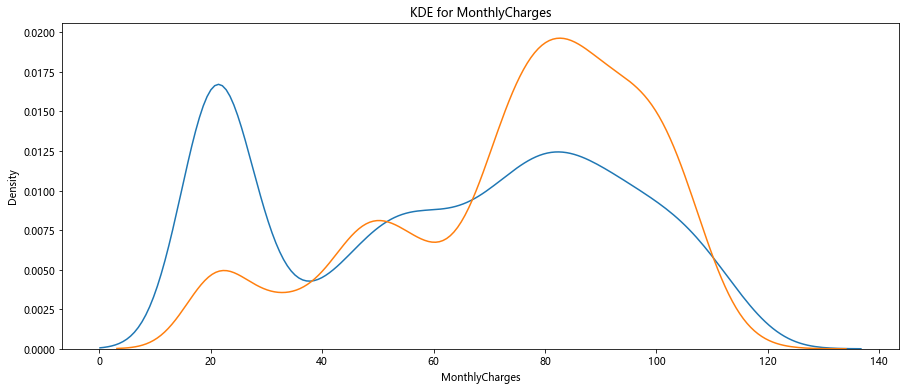

In [45]:
def kdeplot(df,feature):
    plt.figure()
    ax1=sns.kdeplot(df[df['Label']=='No'][feature],label='Label:No')
    ax1=sns.kdeplot(df[df['Label']=='Yes'][feature],label='Label:Yes')
    plt.title('KDE for {}'.format(feature))
    plt.show()
userChargeFeatures = train_data[['TotalCharges','MonthlyCharges','Label']]
kdeplot(userChargeFeatures,'TotalCharges')
kdeplot(userChargeFeatures,'MonthlyCharges')

在支付费用方面，月支付较高的用户更容易流失，可能由于价格过高使消费者望而却步；总费用较低的用户更容易流失，可能该业务仍需要优化。

### 2.4 总结
单身用户及无家属的独居人士更容易流失，可以继续深入调查这些用户的需求并改进业务，以达到扩展客户来源的效果。合同期限越长的用户越容易流失，说明产品不仅要考虑到短期效果好的目标，还要优化产品满足用户长期使用的需求，从而巩固老用户。针对支付费用方面，为了减少因月支付较高引起的客户流失，可以适当调整月费用。

### 3 模型预测
- 使用GBDT进行预测，在选择17个主要特征，决策树最大深度为2，estimator个数为60时的预测准确率最高，此时准确率为0.768。

#### 3.1 GBDT
- 训练XGBoost分类器，调整参数max_depth=2,n_estimators=60时各评价指标达到当前最优。

In [46]:
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score


In [47]:

clf = Pipeline(steps=[("classifier",XGBClassifier(max_depth=2,n_estimators=60,n_jods=3))])

# 训练
clf.fit(X_train[col], y_train)
pickle.dump(clf, open("churn_xgb.model", "wb"))

# 预测
model = pickle.load(open("churn_xgb.model", "rb"))
predictions = model.predict(X_test[col])
predict_proba = model.predict_proba(X_test[col])[:, 1]

# 模型评价
print("acc:", accuracy_score(y_test, predictions))
print("pri:", precision_score(y_test, predictions))
print("rec:", recall_score(y_test, predictions))
print("auc:", roc_auc_score(y_test, predict_proba))


[18:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_jods } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
acc: 0.7692797960484385
pri: 0.6860643185298622
rec: 0.740495867768595
auc: 0.8272581530125853


D:\Anaconda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [48]:
label = model.predict(custmer_test[col])
s = pd.DataFrame(custmer_test.iloc[:,0])
s['Label'] = label

# 转为yes/no
def binary_map(x):
    if x==0:
        return 'No'
    else:
        return 'Yes'
s['Label'] = s['Label'].apply(binary_map)

In [49]:
s.to_csv('submit_gbdt1.csv',index=False)